In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100039 entries, 63829 to 85084
Data columns (total 75 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 100039 non-null  int64  
 1   year                               100039 non-null  int64  
 2   loan_amount                        100039 non-null  int64  
 3   rate_of_interest                   100039 non-null  float64
 4   Interest_rate_spread               100039 non-null  float64
 5   Upfront_charges                    100039 non-null  float64
 6   property_value                     100039 non-null  float64
 7   income                             100039 non-null  float64
 8   Credit_Score                       100039 non-null  int64  
 9   LTV                                100039 non-null  float64
 10  dtir1                              100039 non-null  float64
 11  loan_limit_ncf                     100039

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [5]:
def model_info(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred))
    print('Recall score: ', recall_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred))

In [6]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    print('Train:')
    y_train_pred = model.predict(X_train)
    model_info(y_train, y_train_pred)

    print('Test:')
    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)
    
    return model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
knn_no_params = KNeighborsClassifier()

In [10]:
knn_no_params = build_model(knn_no_params, X_train, X_test, y_train, y_test)

Train:
Confusion matrix: 
 [[74414   794]
 [ 6961 17870]]
Accuracy score:  0.9224802327092434
Precision score:  0.9574582083154737
Recall score:  0.7196649349603318
F1 score:  0.8217036440970226
Test:
Confusion matrix: 
 [[31607   625]
 [ 3870  6772]]
Accuracy score:  0.8951579045575407
Precision score:  0.9155062863322969
Recall score:  0.6363465514001128
F1 score:  0.7508176728200011


In [11]:
from sklearn.model_selection import GridSearchCV

In [26]:
params = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [27]:
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score)

In [28]:
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring=f1_scorer)
knn_cv = build_model(knn_cv, X_train, X_test, y_train, y_test)

Train:
Confusion matrix: 
 [[75208     0]
 [    0 24831]]
Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0
Test:
Confusion matrix: 
 [[31727   505]
 [ 3711  6931]]
Accuracy score:  0.901665344964314
Precision score:  0.9320871436256052
Recall score:  0.6512873520015035
F1 score:  0.7667883615444187


In [29]:
knn_cv.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [30]:
knn_cv.best_score_

0.7663798131153375

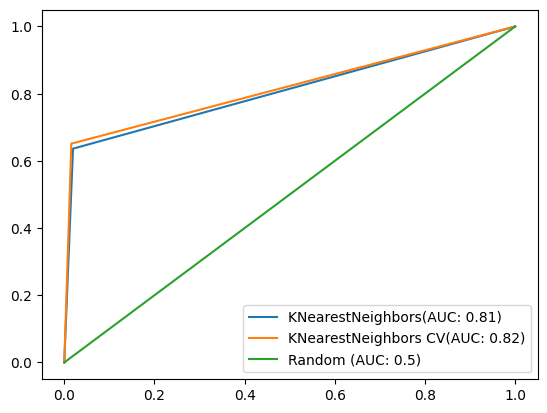

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn_no_params, knn_cv.best_estimator_]
model_names = ['KNearestNeighbors', 'KNearestNeighbors CV']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(AUC: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)')
plt.legend()
plt.show()

In [32]:
from joblib import dump
dump(models, 'knn.joblib')

['knn.joblib']